In [1]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from IPython.display import Audio
%matplotlib inline
sns.set_style("ticks")

In [2]:
def plot_stft(sig):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(sig)), ref=np.max)
    librosa.display.specshow(D, y_axis='linear');

In [3]:
def plot_mel_specgtrogram(y):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                             y_axis='mel', sr=sr);



In [4]:
def plot_dft(sig, win_len=1024):
    window = np.hamming(win_len)
    sig = window * sig[:win_len]
    D = np.abs(np.fft.fft(sig))[:win_len//2]
    xs = np.arange(win_len/2) * (22050/win_len)
    plt.plot(xs, D)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [6]:
def extract_mfccs(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return np.concatenate([
        mfccs.mean(axis=1),
        mfccs.std(axis=1)
    ])

def extract_chroma(y, sr):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.concatenate([
        chroma.mean(axis=1),
        chroma.std(axis=1)
    ])

def extract_feats(y, sr):
    chroma = extract_chroma(y, sr)
    mfccs = extract_mfccs(y, sr)
    feats = np.concatenate([chroma, mfccs])
    
    labels = []   
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_mean'.format(i))
    for i in range(len(chroma) // 2):
        labels.append('chroma_{}_std'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_mean'.format(i))
    for i in range(len(mfccs) // 2):
        labels.append('mfcc_{}_std'.format(i))
        
    return feats, labels

def feats_for_fname(fname):
    y, sr = librosa.core.load(fname)
    return extract_feats(y, sr)

def fname_generator(genre):
    #for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/genres'):
    for root, dirs, files in os.walk('/media/bita/Elements/Ironhack-Final/Audios/genres'):    
        for file in files:
            if file.endswith('.wav') and genre in file:
                yield os.path.join(root, file)         
                
def df_for_genre(genre):
    fnames = []
    feats = []
    for fname in fname_generator(genre):
        # print("extracting feats for {}".format(fname))
        cur_feats, labels = feats_for_fname(fname)
        fnames.append(fname)
        feats.append(cur_feats)
    df = pd.DataFrame(feats, columns=labels, index=fnames)
    df['label'] = genre
    return df

In [8]:
#data = pd.concat([df_for_genre(genre) for genre in ['pop', 'classical']])
#data = pd.concat([df_for_genre(genre) for genre in ['Meow', 'Bark']])
data = pd.concat([df_for_genre(genre) for genre in ['snore', 'clapping']])

In [9]:
data

,chroma_0_mean,chroma_1_mean,chroma_2_mean,chroma_3_mean,chroma_4_mean,chroma_5_mean,chroma_6_mean,chroma_7_mean,chroma_8_mean,chroma_9_mean,...,mfcc_11_std,mfcc_12_std,mfcc_13_std,mfcc_14_std,mfcc_15_std,mfcc_16_std,mfcc_17_std,mfcc_18_std,mfcc_19_std,label
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.01.wav,0.433581,0.401589,0.393526,0.406149,0.414346,0.446865,0.513502,0.581768,0.552369,0.505996,...,7.095170,7.936517,7.121915,7.125088,6.743950,6.569393,6.897517,6.803092,6.024270,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.02.wav,0.499477,0.496191,0.505089,0.475646,0.407228,0.403520,0.435315,0.505431,0.581060,0.599687,...,7.621115,4.448371,4.558438,5.009031,4.640597,6.760096,5.502310,5.952415,5.705662,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.07048059.wav,0.504400,0.591929,0.737303,0.744752,0.535243,0.486802,0.536102,0.603394,0.598146,0.567542,...,4.566658,5.043691,4.893472,4.604782,3.486903,3.888660,4.626582,4.061190,3.446051,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.07071010.wav,0.463673,0.570257,0.638980,0.527047,0.373536,0.324639,0.281819,0.307214,0.330871,0.324646,...,8.096536,10.578889,9.472044,9.268238,9.593770,8.984208,8.011192,7.857379,6.692812,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.121801.wav,0.590639,0.641429,0.596838,0.548685,0.561415,0.563696,0.545720,0.506227,0.491690,0.469479,...,6.165758,6.748354,5.242160,6.852744,4.582646,4.613779,4.661328,5.116052,4.460474,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.196255.wav,0.138763,0.151849,0.221769,0.269995,0.267126,0.260680,0.253483,0.251527,0.230041,0.180619,...,5.408755,9.335938,8.820699,9.447099,9.795056,7.790140,7.663699,7.764407,10.145323,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.340893.wav,0.592129,0.592033,0.575836,0.593029,0.647576,0.654879,0.557976,0.491248,0.482870,0.495174,...,9.020511,7.017171,5.872518,7.512091,8.557546,8.508533,5.287538,7.511976,5.682600,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.432996.wav,0.495171,0.439073,0.443952,0.482032,0.410500,0.366837,0.352884,0.411734,0.491993,0.581544,...,7.892978,6.781127,6.420640,6.443816,6.295905,5.557297,7.011241,6.562869,5.536347,snore
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0c7ae294.wav,0.579144,0.624621,0.668492,0.650194,0.642008,0.657012,0.673763,0.649138,0.659904,0.620277,...,4.967063,4.636360,5.298031,5.124247,4.578990,3.804608,4.492270,4.076270,4.078952,clapping
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0d0d1b88.wav,0.702737,0.665958,0.665049,0.654912,0.670044,0.682137,0.655154,0.649913,0.645418,0.632548,...,4.989810,5.867290,5.189955,5.452009,4.614917,4.699172,4.063153,4.222307,3.772707,clapping


In [10]:
y = data['label']
X = data.drop('label', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [14]:
y_pred = pipeline.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.6

In [16]:
y_test

/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0dfcedf6.wav    clapping
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0c7ae294.wav    clapping
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.340893.wav               snore
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.07071010.wav             snore
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0f1dbff5.wav    clapping
Name: label, dtype: object

In [17]:
y_pred

array(['snore', 'clapping', 'snore', 'snore', 'snore'], dtype=object)

In [18]:
y_pred != y_test


/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0dfcedf6.wav     True
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0c7ae294.wav    False
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.340893.wav            False
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.07071010.wav          False
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0f1dbff5.wav     True
Name: label, dtype: bool

In [19]:
y_pred_test_wrong = (y_pred != y_test)
y_pred_test_right = (y_pred == y_test)

In [20]:
type(y_pred_test_wrong)

pandas.core.series.Series

In [21]:
df = y_pred_test_wrong.to_frame()

In [22]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

df


,label
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0dfcedf6.wav,True
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0c7ae294.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.340893.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.07071010.wav,False
/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0f1dbff5.wav,True


In [23]:
# PlAY True/FALSE identifications
for t in df.index[0:1]:
    print(t)
    y, sr = librosa.core.load(t)
    
Audio(data=y, rate=sr)

/media/bita/Elements/Ironhack-Final/Audios/genres/clapping/clapping.0dfcedf6.wav


In [24]:
df_wrong = y_pred_test_wrong.to_frame()
df_right = y_pred_test_right.to_frame()

In [25]:
# Applause predicted as Applause
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Applause/Applause.50e7451d.wav')
Audio(data=y, rate=sr)

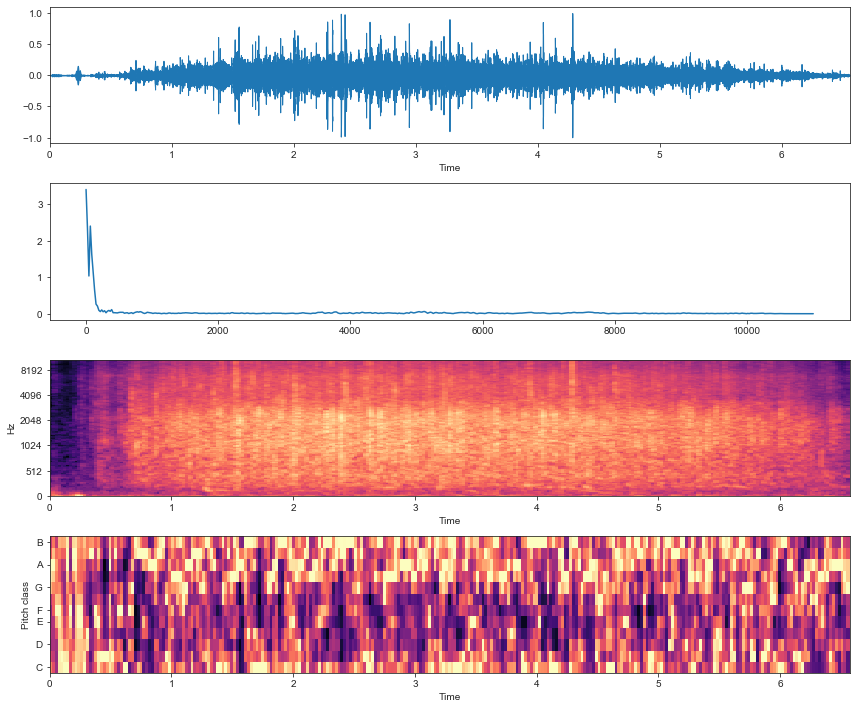

In [26]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [27]:
# Snore predicted as Applause
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.340893.wav')
Audio(data=y, rate=sr)

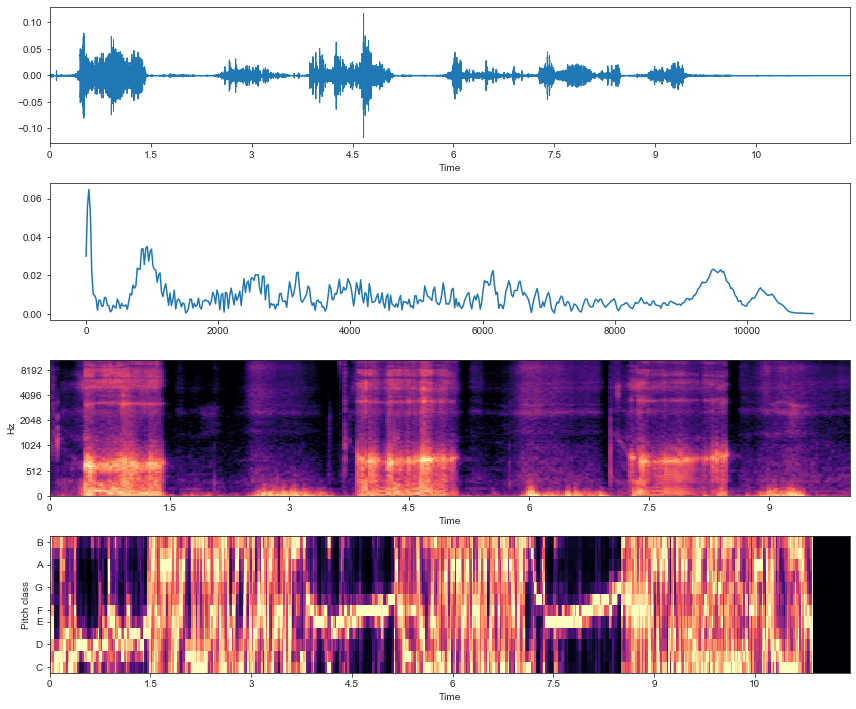

In [28]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [ ]:
# Cat predicted as cat.
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.1fac40bb.wav')
Audio(data=y, rate=sr)

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [ ]:
# Snore predicted falsely
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.07048059.wav')
Audio(data=y, rate=sr)

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [ ]:
# Snore predicted falsely 
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/snore/snore.01.wav')
Audio(data=y, rate=sr)

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 12))
#plt.figure(figsize=(5, 1))


plt.subplot(5, 1, 1)
librosa.display.waveplot(y, sr)
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 2)
plot_dft(y[sr*0:])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 3)
plot_mel_specgtrogram(y[:sr*10])
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')

plt.subplot(5, 1, 4)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Linear-frequency power spectrogram')


plt.tight_layout()

In [ ]:
# Cat predicted as cat!
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Meow/Meow.876cd66b.wav')
Audio(data=y, rate=sr)

In [ ]:
# Dog predicted as cat 
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Bark/Bark.5baff24a.wav')
Audio(data=y, rate=sr)

In [ ]:
# Dog predicted as cat 
y, sr = librosa.core.load('/media/bita/Elements/Ironhack-Final/Audios/genres/Bark/Bark.92fd0236.wav')
Audio(data=y, rate=sr)